# K-Nearest Neighbors

## Overview

In this section we will dive into one of the simplest algorithms to perform classification. Namely, the
<a href="https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm">k-nearest neighbors algorithm</a> or kNN for short.
This is a non-parametric supervised learning method that it can be used for clustering, classification and regression. 

We will limit ourselves to the case of classification herein. In the case of classification, the input to
the algorithm is a dataset $D$ of data points alongside their labels $Y$ and a positive integer $k$.
The algorithm tries to find the $k$ most similar data points in $D$ in order to produce the classification output.


# K-Nearest Neighbors

The kNN algorithm is fairly is to grasp. The input is a dataset $D$ a positive integer $k$ and a
distance function that allows us to compute similarities between the points in the dataset.
The algorithm tries to find the $k$ most similar data points in $D$ in order to produce the classification output.
An object is classified using a plurality vote of its neighbors; the object is assigned the class most common among its $k$ nearest neighbors. If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

Thus, the vanilla KNN algorithm does not train any parameters although we will have to experiment 
on a different number of neighbors and possibly the distance function to use. The algorithm stores the entire
dataset $D$ in memory something that can be really problematic for large datasets. In addition, the vanilla
algorithm for a dataset with $N$ points each having $M$ features, requires $O(MN^2)$ time which can be prohibitive
for large datasets. Implementations therefore of the KNN algorithm use <a href="https://en.wikipedia.org/wiki/K-d_tree">k-d$ trees</a>, see e.g. [2] or <a href="https://en.wikipedia.org/wiki/Ball_tree">ball trees</a> however, we will not go into details. 


Since this algorithm relies on distance for classification, if the features represent different
physical units or come in vastly different scales then normalizing the training data can improve its accuracy dramatically.[3]. Both for classification and regression, a useful technique can be to assign weights to the contributions of the neighbors, so that the nearer neighbors contribute more to the average than the more distant ones. For example, a common weighting scheme consists in giving each neighbor a weight of 1/d, where d is the distance to the neighbor.[4]

A commonly used distance metric for continuous variables is Euclidean distance. For discrete variables, such as for text classification, another metric can be used, such as the overlap metric (or Hamming distance). In the context of gene expression microarray data, for example, k-NN has been employed with correlation coefficients, such as Pearson and Spearman, as a metric.[5] Often, the classification accuracy of k-NN can be improved significantly if the distance metric is learned with specialized algorithms such as Large Margin Nearest Neighbor or Neighbourhood components analysis.

A drawback of the basic "majority voting" classification occurs when the class distribution is skewed. 
That is, examples of a more frequent class tend to dominate the prediction of the new example, because they tend to be common among the k nearest neighbors due to their large number.[6] One way to overcome this problem is to weight the classification, taking into account the distance from the test point to each of its k nearest neighbors. The class (or value, in regression problems) of each of the k nearest points is multiplied by a weight proportional to the inverse of the distance from that point to the test point. Another way to overcome skew is by abstraction in data representation. For example, in a self-organizing map (SOM), each node is a representative (a center) of a cluster of similar points, regardless of their density in the original training data. K-NN can then be applied to the SOM.

The best choice of k depends upon the data; generally, larger values of 
k reduces effect of the noise on the classification,[7] but make boundaries between classes less distinct. A good k can be selected by various heuristic techniques (see hyperparameter optimization). The special case where the class is predicted to be the class of the closest training sample (i.e. when k = 1) is called the nearest neighbor algorithm.

The accuracy of the k-NN algorithm can be severely degraded by the presence of noisy or irrelevant features, or if the feature scales are not consistent with their importance. Much research effort has been put into selecting or scaling features to improve classification. A particularly popular[citation needed] approach is the use of evolutionary algorithms to optimize feature scaling.[8] Another popular approach is to scale features by the mutual information of the training data with the training classes.[citation needed]

In binary (two class) classification problems, it is helpful to choose k to be an odd number as this avoids tied votes. One popular way of choosing the empirically optimal k in this setting is via bootstrap method.[9]

## Computational example

Let's perform vessel classification using KNN. We will use the implementation in the <a href="https://scikit-learn.org/stable/index.html">sklearn</a> library.

In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

In [7]:
X, y = load_iris(return_X_y=True)
num_classes = len(set(y))
print(f"We have {y.size} labeled examples across the following "
      f"{num_classes} classes:\n{set(y)}\n")
print(f"First four feature rows:\n{X[:4]}")
print(f"\nFirst four labels:\n{y[:4]}")

We have 150 labeled examples across the following 3 classes:
{0, 1, 2}

First four feature rows:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]]

First four labels:
[0 0 0 0]


In [8]:
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.25)
print(f"Training set labels:\n{y_train}")

Training set labels:
[0 2 1 2 1 0 2 0 2 0 0 2 0 2 1 1 1 2 2 1 1 0 1 2 2 0 1 1 1 1 0 0 0 2 1 2 0]


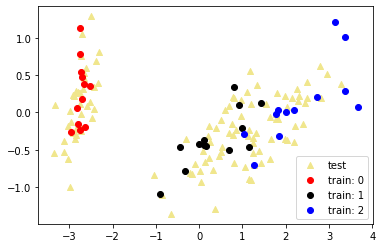

In [9]:
pca_model = PCA()
transformed_data_2D = pca_model.fit_transform(X_train)
 
unlabeled_data = pca_model.transform(X_test)
plt.scatter(unlabeled_data[:,0], unlabeled_data[:,1],
            color='khaki', marker='^', label='test')
 
for label in range(3):
    data_subset = transformed_data_2D[y_train == label]
    plt.scatter(data_subset[:,0], data_subset[:,1],
            color=['r', 'k', 'b'][label], label=f'train: {label}')
 
plt.legend()
plt.show()

## Summary

## References

1. <a href="https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm">k-nearest neighbors algorithm</a>
2. Marcello La Rocca, _Advanced algorithms and data structures_, Manning Publications.